<a href="https://colab.research.google.com/github/koushik395/Machine-Learning/blob/main/SURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Write a program to extract SURF/SIFT feature descriptors from a sample image.
Speeded-Up Robust Features (SURF)

## We use the mahotas Python framework for extracting SURF feature descriptors from our sample images.


In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## The first phase is to detect points of interest using square shaped filters and hessian matrices. The second phase is to build feature descriptors by extracting localized features around these points of interest. 

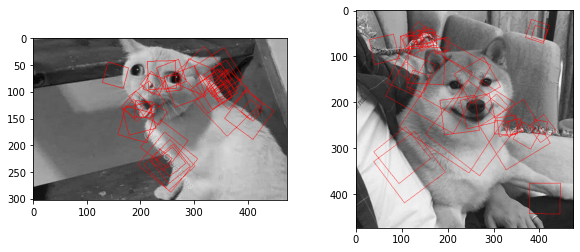

In [ ]:
import skimage
from skimage import io
import mahotas as mh 
from mahotas.colors import rgb2gray
from mahotas.features import surf
import matplotlib.pyplot as plt
cat = io.imread("surfCat.jpeg")
dog = io.imread("surfDog.jpeg")
cat_mh = rgb2gray(cat)
dog_mh = rgb2gray(dog)
cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1,threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1,threshold=0.1, max_points=54)
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

## The square boxes in the image plots depict the square image regions around the points of interest which were used for localized feature extraction

## You can also use the surf.dense(...) function to extract uniform dimensional feature descriptors at dense points with regular interval spacing in pixels.

In [ ]:
cat_surf_fds = surf.dense(cat_mh, spacing=10)
dog_surf_fds = surf.dense(dog_mh, spacing=10)
print(cat_surf_fds.shape)
print(dog_surf_fds.shape)

(740, 64)
(1369, 64)


### The basic idea is hence to get a feature descriptor matrix from using any algorithm like SURF, apply an unsupervised algorithm like K-means clustering, and extract out k bins or visual features/words and their counts (based on number of feature descriptors assigned to each bin). Then for each subsequent image, once you extract the feature descriptors, you can use the K-means model to assign each feature descriptor to one of the visual feature clusters and get a one-dimensional vector of counts.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
df = pd.DataFrame(['Cat'], columns=['Image'])
k = 20                                                        
km = KMeans(k, n_init=100, max_iter=100)
surf_fd_features = np.array([cat_surf_fds])
km.fit(np.concatenate(surf_fd_features))
vbow_features = []
for feature_desc in surf_fd_features:
  labels = km.predict(feature_desc)
  vbow = np.bincount(labels, minlength=k)
  vbow_features.append(vbow)
vbow_df = pd.DataFrame(vbow_features)
pd.concat([df, vbow_df], axis=1)

,Image,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Cat,39,57,37,40,107,43,86,24,23,...,43,54,23,10,19,8,23,27,10,8


In [ ]:
vbow_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,51,23,62,46,52,106,31,47,43,85,23,14,10,21,17,4,22,23,43,17
